In [ ]:
import os
import pandas as pd
from tqdm import tqdm_notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Temporary/NLP

/content/drive/MyDrive/Temporary/NLP


In [ ]:
df = pd.read_csv("datasets/merged_descriptions.csv")
df.head()

,title,description,genres,meta_score,user_score,developer,platform,release_date,rating
0,10-IN-1: ARCADE COLLECTION,Bring back those retro memories! Test your ski...,"Genre(s): Miscellaneous, Compilation, Compilation",NaN,3.3,Gamelion Studios,3DS,"Aug 15, 2013",E
1,1001 SPIKES,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","Genre(s): Action, General, Platformer, Platfor...",73.0,6.6,Nicalis,3DS,"Jun 3, 2014",T
2,101 DINOPETS 3D,Over 101 dinos to adopt and love! Teach your d...,"Genre(s): Simulation, General, General, Virtua...",NaN,tbd,Teyon,3DS,"Jan 10, 2013",E
3,101 PENGUIN PETS 3D,Over 101 penguins to adopt and love! Dress up ...,"Genre(s): Simulation, Miscellaneous, General, ...",NaN,tbd,Teyon,3DS,"Oct 17, 2013",E
4,101 PONY PETS 3D,Over 101 ponies to adopt and love! Teach your ...,"Genre(s): Simulation, Miscellaneous, Virtual, ...",NaN,9.0,Teyon,3DS,"Jul 24, 2014",E


# Data preprocessing 1
Removing All the duplicates and null values and small dsecriptions and unnecessary genres

In [ ]:
# Removing unnecessary columns
df.drop(['title','meta_score', 	'user_score' ,'developer',	'platform',	'release_date',	'rating'], axis=1, inplace=True)
df.describe

<bound method NDFrame.describe of                                               description  \
0       Bring back those retro memories! Test your ski...   
1       Aban Hawkins & the 1,001 Spikes is a 2D platfo...   
2       Over 101 dinos to adopt and love! Teach your d...   
3       Over 101 penguins to adopt and love! Dress up ...   
4       Over 101 ponies to adopt and love! Teach your ...   
...                                                   ...   
174590  Step into the shoes of Magnus Tide, a young fi...   
174591  Make a promise to yourself today and begin a c...   
174592  Marking the debut of the Yu-Gi-Oh franchise on...   
174593  In Zapper, you play a small creature that emba...   
174594  The intergalactic journey begins when a myster...   

                                                   genres  
0       Genre(s): Miscellaneous, Compilation, Compilation  
1       Genre(s): Action, General, Platformer, Platfor...  
2       Genre(s): Simulation, General, General, Virtu

In [ ]:
df.head()

,description,genres
0,Bring back those retro memories! Test your ski...,"Genre(s): Miscellaneous, Compilation, Compilation"
1,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","Genre(s): Action, General, Platformer, Platfor..."
2,Over 101 dinos to adopt and love! Teach your d...,"Genre(s): Simulation, General, General, Virtua..."
3,Over 101 penguins to adopt and love! Dress up ...,"Genre(s): Simulation, Miscellaneous, General, ..."
4,Over 101 ponies to adopt and love! Teach your ...,"Genre(s): Simulation, Miscellaneous, Virtual, ..."


In [ ]:
df.shape

(174595, 2)

In [ ]:
# Removing Duplicate descriptions
df = df.drop_duplicates(subset='description')
df.shape

(96939, 2)

In [ ]:
# Remove empty genres
df.dropna(subset=['genres'], inplace=True)
df.shape

<ipython-input-12-dc14a2b2f9ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['genres'], inplace=True)


(96935, 2)

In [ ]:
# Remove empty description
df.dropna(subset=['description'], inplace=True)
df.shape

<ipython-input-13-e1a9f680d006>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['description'], inplace=True)


(96935, 2)

In [ ]:
# Get the list of the smallest descriptions

# get the length of each value in the "description" column
desc_lengths = df["description"].str.len()

# find the indices of the top 5 smallest lengths
smallest_indices = desc_lengths.nsmallest(10, keep="last").index.tolist()

# create a new DataFrame with only the top 5 smallest values
top_10_smallest = df.loc[smallest_indices, ["description"]]

# print the top 5 smallest values
print(top_10_smallest)


       description
23558            .
139730         TEN
139760       Tetra
140254      TOMOMI
132695      Tasks.
106535      Fivies
106939     Jack-O'
138872   Sky Games
138826   Dominoes.
137493  Peachy Boy


In [ ]:
# Remove descriptions of upto two words

# split the "description" column into words
word_counts = df["description"].str.split().str.len()

# filter the DataFrame for rows with up to two words
rows_to_drop = df[word_counts <= 2]

# drop the filtered rows from the DataFrame
df = df.drop(rows_to_drop.index)

# view the updated DataFrame
print(df)

                                              description  \
0       Bring back those retro memories! Test your ski...   
1       Aban Hawkins & the 1,001 Spikes is a 2D platfo...   
2       Over 101 dinos to adopt and love! Teach your d...   
3       Over 101 penguins to adopt and love! Dress up ...   
4       Over 101 ponies to adopt and love! Teach your ...   
...                                                   ...   
174587  Lead a kung fu monk and his three martial arts...   
174589  Drake is a star fighter pilot escorting an exe...   
174590  Step into the shoes of Magnus Tide, a young fi...   
174592  Marking the debut of the Yu-Gi-Oh franchise on...   
174594  The intergalactic journey begins when a myster...   

                                                   genres  
0       Genre(s): Miscellaneous, Compilation, Compilation  
1       Genre(s): Action, General, Platformer, Platfor...  
2       Genre(s): Simulation, General, General, Virtua...  
3       Genre(s): Simulatio

In [ ]:
# Checking the smallest dsecriptions again

# get the length of each value in the "description" column
desc_lengths = df["description"].str.len()

# find the indices of the top 5 smallest lengths
smallest_indices = desc_lengths.nsmallest(10, keep="last").index.tolist()

# create a new DataFrame with only the top 5 smallest values
top_10_smallest = df.loc[smallest_indices, ["description"]]

# print the top 5 smallest values
print(top_10_smallest)

             description
7609       A parody RPG.
69790     Save the toys!
32893     A puzzle game.
137314   A visual novel.
105874   Run for donuts.
89514    2D Arcade Game.
66521    Tanks in space!
135897  Kids: ZOO Puzzle
112016  US Capitals, yo!
74922   Run, girls! Run!


In [ ]:
df.head()

,description,genres
0,Bring back those retro memories! Test your ski...,"Genre(s): Miscellaneous, Compilation, Compilation"
1,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","Genre(s): Action, General, Platformer, Platfor..."
2,Over 101 dinos to adopt and love! Teach your d...,"Genre(s): Simulation, General, General, Virtua..."
3,Over 101 penguins to adopt and love! Dress up ...,"Genre(s): Simulation, Miscellaneous, General, ..."
4,Over 101 ponies to adopt and love! Teach your ...,"Genre(s): Simulation, Miscellaneous, Virtual, ..."


In [ ]:
df['genres'] = df['genres'].str.replace("Genre\(s\): ", "")
df.head()

<ipython-input-18-3afa23410622>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['genres'] = df['genres'].str.replace("Genre\(s\): ", "")


,description,genres
0,Bring back those retro memories! Test your ski...,"Miscellaneous, Compilation, Compilation"
1,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","Action, General, Platformer, Platformer, 2D, 2D"
2,Over 101 dinos to adopt and love! Teach your d...,"Simulation, General, General, Virtual, Pet"
3,Over 101 penguins to adopt and love! Dress up ...,"Simulation, Miscellaneous, General, General, V..."
4,Over 101 ponies to adopt and love! Teach your ...,"Simulation, Miscellaneous, Virtual, Virtual Li..."


In [ ]:
# Define the genres to remove
genres_to_remove = ['Compilation,' , 'Compilation', 'Miscellaneous,','General,','Other,','Horizontal,','Matching,','Individual,','Top-Down,', 'Miscellaneous','General','Other','Horizontal','Matching','Individual','Top-Down',]

# Remove unwanted genres using str.replace()
for genre in genres_to_remove:
    df['genres'] = df['genres'].str.replace(genre, "")

# Print the updated DataFrame
df.head()


,description,genres
0,Bring back those retro memories! Test your ski...,
1,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","Action, Platformer, Platformer, 2D, 2D"
2,Over 101 dinos to adopt and love! Teach your d...,"Simulation, Virtual, Pet"
3,Over 101 penguins to adopt and love! Dress up ...,"Simulation, Virtual, Virtual Life, Pet"
4,Over 101 ponies to adopt and love! Teach your ...,"Simulation, Virtual, Virtual Life, Pet"


In [ ]:
# Define the mapping of old values to new values
# Need to temporarily change some names so that unintentional duplicates aren't created
mapping = {
    'Combat' : 'Action',
    "Beat-'Em-Up" : 'Action',
    "Light Gun": "Shooter", 
    "Shoot-'Em-Up": "Shooter",
    'Virtual Life': 'Custom_VLyf',
    'Virtual': 'Custom_VLyf',
    "Massively Multiplayer Online" : "MMO",
    "Massively Multiplayer" : "MMO",
    "Sim": "Smulation",
    "Hidden Object": "Puzzle",
    "Rhythm": "Music",
    "Automobile": "Driving",
    "Board Games": "Board / Card Game",
    "Card Battle": "Board / Card Game",
    "Action Adventure": "Action, Adventure",
    "Action RPG": "Action, RPG",
    "Console-style RPG": "RPG",
    "Scrolling" : "Platformer",
    "Tactics" : "Tactical",
}

# Replace the old values with new values using str.replace()
df['genres'] = df['genres'].str.replace('|'.join(mapping.keys()), lambda x: mapping[x.group()], regex=True)

# Print the updated DataFrame
df.head()


,description,genres
0,Bring back those retro memories! Test your ski...,
1,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","Action, Platformer, Platformer, 2D, 2D"
2,Over 101 dinos to adopt and love! Teach your d...,"Smulationulation, Custom_VLyf, Pet"
3,Over 101 penguins to adopt and love! Dress up ...,"Smulationulation, Custom_VLyf, Custom_VLyf,..."
4,Over 101 ponies to adopt and love! Teach your ...,"Smulationulation, Custom_VLyf, Custom_VLyf, Pet"


In [ ]:
# Define the mapping of old values to new values
mapping = {
    "Smulationulation": "Simulation",
    "Custom_VLyf" : "Virtual Life",
    "MMO" : "Massively Multiplayer Online",
    "Smulation" : "Simulation",
    "RPG" : "Role Playing Game"
}

# Replace the old values with new values using str.replace()
df['genres'] = df['genres'].str.replace('|'.join(mapping.keys()), lambda x: mapping[x.group()], regex=True)

# Print the updated DataFrame
df.head()

,description,genres
0,Bring back those retro memories! Test your ski...,
1,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","Action, Platformer, Platformer, 2D, 2D"
2,Over 101 dinos to adopt and love! Teach your d...,"Simulation, Virtual Life, Pet"
3,Over 101 penguins to adopt and love! Dress up ...,"Simulation, Virtual Life, Virtual Life, Pet"
4,Over 101 ponies to adopt and love! Teach your ...,"Simulation, Virtual Life, Virtual Life, Pet"


In [ ]:
print(df.shape)

# Remove spaces before and after commas in the 'genres' column
df['genres'] = df['genres'].str.replace(r'\s*,\s*', ',')

# Check for missing values in the genres column, including empty strings
missing_values = df['genres'].str.strip().apply(lambda x: x == '').sum()

# Remove rows with missing or empty values in the genres column
df = df[df['genres'].str.strip() != '']


# Print the updated DataFrame and the number of removed rows
print('Number of missing values:', missing_values)

print(df.shape)
df.head()

(96900, 2)
Number of missing values: 1353
(95547, 2)


<ipython-input-22-e5a2490e5c7e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['genres'] = df['genres'].str.replace(r'\s*,\s*', ',')


,description,genres
1,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","Action,Platformer,Platformer,2D,2D"
2,Over 101 dinos to adopt and love! Teach your d...,"Simulation,Virtual Life,Pet"
3,Over 101 penguins to adopt and love! Dress up ...,"Simulation,Virtual Life,Virtual Life,Pet"
4,Over 101 ponies to adopt and love! Teach your ...,"Simulation,Virtual Life,Virtual Life,Pet"
5,Four brave gnomes venture on a journey so epic...,"Action,Platformer,Platformer,2D,2D"


In [ ]:
from collections import OrderedDict

# define a function to remove duplicates and leading/trailing whitespaces from a string
def clean_genres(genre_str):
    genres = [genre.strip() for genre in genre_str.split(',')]  # remove leading/trailing whitespaces
    unique_genres = list(set(genres))  # remove duplicates
    return ', '.join(unique_genres)

# apply the function to the 'genre' column in the dataframe
df['genres'] = df['genres'].apply(clean_genres)

print(df.shape)
# Print the updated DataFrame
df.head()

(95547, 2)


,description,genres
1,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","2D, Platformer, Action"
2,Over 101 dinos to adopt and love! Teach your d...,"Pet, Virtual Life, Simulation"
3,Over 101 penguins to adopt and love! Dress up ...,"Pet, Virtual Life, Simulation"
4,Over 101 ponies to adopt and love! Teach your ...,"Pet, Virtual Life, Simulation"
5,Four brave gnomes venture on a journey so epic...,"2D, Platformer, Action"


In [ ]:
# Fixing the genres to contain only the genere types
# df['genres'] = df['genres'].str.replace("Genre\(s\): ", "")
# df=df.applymap(str)
df['genres'] = df['genres'].str.split(',')
df=df.applymap(str)
df.head()

,description,genres
1,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","['2D', ' Platformer', ' Action']"
2,Over 101 dinos to adopt and love! Teach your d...,"['Pet', ' Virtual Life', ' Simulation']"
3,Over 101 penguins to adopt and love! Dress up ...,"['Pet', ' Virtual Life', ' Simulation']"
4,Over 101 ponies to adopt and love! Teach your ...,"['Pet', ' Virtual Life', ' Simulation']"
5,Four brave gnomes venture on a journey so epic...,"['2D', ' Platformer', ' Action']"


In [ ]:
df.shape

(95547, 2)

In [ ]:
df.head(20)

,description,genres
1,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","['2D', ' Platformer', ' Action']"
2,Over 101 dinos to adopt and love! Teach your d...,"['Pet', ' Virtual Life', ' Simulation']"
3,Over 101 penguins to adopt and love! Dress up ...,"['Pet', ' Virtual Life', ' Simulation']"
4,Over 101 ponies to adopt and love! Teach your ...,"['Pet', ' Virtual Life', ' Simulation']"
5,Four brave gnomes venture on a journey so epic...,"['2D', ' Platformer', ' Action']"
6,"Enjoy 2048, the most addictive number sliding ...","['Puzzle', ' Logic']"
7,See your favorite games come alive! Get up clo...,"['', ' Action']"
8,3D After Burner II is the 1987 flight game fir...,"['Simulation', ' Shooter', ' Platformer', ' Fl..."
9,Rise from your grave!\n\nSummoned from the dea...,"['2D', ' Action']"
10,One of the Nintendo Entertainment System's acc...,"['Driving', ' Arcade', ' Motorcycle', ' Racing..."


In [ ]:
import ast
df['genres'] = df['genres'].apply(lambda x: [i.strip() for i in ast.literal_eval(x) if i.strip()])
df.head(20)

,description,genres
1,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","[2D, Platformer, Action]"
2,Over 101 dinos to adopt and love! Teach your d...,"[Pet, Virtual Life, Simulation]"
3,Over 101 penguins to adopt and love! Dress up ...,"[Pet, Virtual Life, Simulation]"
4,Over 101 ponies to adopt and love! Teach your ...,"[Pet, Virtual Life, Simulation]"
5,Four brave gnomes venture on a journey so epic...,"[2D, Platformer, Action]"
6,"Enjoy 2048, the most addictive number sliding ...","[Puzzle, Logic]"
7,See your favorite games come alive! Get up clo...,[Action]
8,3D After Burner II is the 1987 flight game fir...,"[Simulation, Shooter, Platformer, Flight, Vert..."
9,Rise from your grave!\n\nSummoned from the dea...,"[2D, Action]"
10,One of the Nintendo Entertainment System's acc...,"[Driving, Arcade, Motorcycle, Racing, Motocross]"


In [ ]:
df=df.applymap(str)
df.head()

,description,genres
1,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","['2D', 'Platformer', 'Action']"
2,Over 101 dinos to adopt and love! Teach your d...,"['Pet', 'Virtual Life', 'Simulation']"
3,Over 101 penguins to adopt and love! Dress up ...,"['Pet', 'Virtual Life', 'Simulation']"
4,Over 101 ponies to adopt and love! Teach your ...,"['Pet', 'Virtual Life', 'Simulation']"
5,Four brave gnomes venture on a journey so epic...,"['2D', 'Platformer', 'Action']"


In [ ]:

# save the dataframe to a CSV file
df.to_csv('filtered_description.csv', index=True)

In [ ]:
for i in range(10):
    if i < len(df['genres']):
        print(df['genres'].iloc[i])

['2D', 'Platformer', 'Action']
['Virtual Life', 'Pet', 'Simulation']
['Virtual Life', 'Pet', 'Simulation']
['Virtual Life', 'Pet', 'Simulation']
['2D', 'Platformer', 'Action']
['Logic', 'Puzzle']
['Action']
['Flight', 'Action', 'Rail', 'Vertical', 'Shooter', 'Platformer', 'Simulation']
['2D', 'Action']
['Driving', 'Motorcycle', 'Racing', 'Arcade', 'Motocross']


In [ ]:
genres_list = df.genres.to_list()
genre_count = {}
for genres in genres_list:
  genre_list = eval(genres)
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 150
{'2D': 9043, 'Platformer': 9720, 'Action': 47409, 'Virtual Life': 2099, 'Pet': 218, 'Simulation': 6831, 'Logic': 1313, 'Puzzle': 12365, 'Flight': 757, 'Rail': 232, 'Vertical': 1205, 'Shooter': 10267, 'Driving': 2848, 'Motorcycle': 121, 'Racing': 3016, 'Arcade': 9002, 'Motocross': 55, 'Fighting': 1318, 'Board / Card Game': 2479, '3D': 6506, 'First-Person': 6689, 'Adventure': 23762, 'Parlor': 327, 'Gambling': 373, 'Japanese-Style': 2073, 'Role-Playing': 8186, 'Train': 111, 'Vehicle': 894, 'Business / Tycoon': 1439, 'Management': 2018, 'Strategy': 11010, 'Roguelike': 461, 'Fantasy': 1683, 'Third-Person': 2465, 'Open-World': 1387, 'Sports': 4024, 'Futuristic': 372, 'Tactical': 2276, 'Turn-Based': 3121, 'Nature': 336, 'Fishing': 159, 'Career': 928, 'Application': 281, 'Visual Novel': 3670, 'Baseball': 273, 'Team': 1353, 'Traditional': 1133, 'Soccer': 544, 'Trivia / Game Show': 443, 'Edutainment': 1268, 'Role Playing Game': 2563, 'Party / Minigame': 1204, 'Metroidvania'

In [ ]:
threshold = int(len(df) * 0.005)
rare_genres = [key for key, value in genre_count.items() if value < threshold]
len(rare_genres), rare_genres[:5]

(100, ['Pet', 'Rail', 'Motorcycle', 'Motocross', 'Parlor'])

In [ ]:
rare_genres

['Pet',
 'Rail',
 'Motorcycle',
 'Motocross',
 'Parlor',
 'Gambling',
 'Train',
 'Roguelike',
 'Futuristic',
 'Nature',
 'Fishing',
 'Application',
 'Baseball',
 'Trivia / Game Show',
 'Metroidvania',
 'Bowling',
 'Alternative',
 'Static',
 'Space',
 'Athletics',
 'Olympic Sports',
 'Hunting',
 'Stacking',
 'Trainer',
 'Kart',
 'Party',
 'Mission-based',
 'Western-Style',
 'Wargame',
 'Formula One',
 'Tennis',
 'GT / Street',
 'Golf',
 'Breeding/Constructing',
 'Music Maker',
 'Football',
 'Pinball',
 'Dancing',
 'Console',
 'Hardware',
 'Skate / Skateboard',
 'Civilian Plane',
 'Boxing / Martial Arts',
 'Horror',
 'Horse Racing',
 'Surf / Wakeboard',
 'Tycoon',
 'Ski / Snowboard',
 'Submarine',
 'Marine',
 'Volleyball',
 'Small Spaceship',
 'Basketball',
 'Car Action',
 'Rally / Offroad',
 'Wrestling',
 'Modern Jet',
 'Surfing',
 'Military',
 'Biking',
 'Futuristic Sub',
 'Demolition Derby',
 'WWII',
 'Billiards',
 'Skateboarding',
 'Ice Hockey',
 'Boxing',
 'Snow / Water',
 'Truck',


In [ ]:
# genres_list = df.genres.to_list()
# revised_genre_list = []
# indices_to_drop = []

# for idx, genres in enumerate(genres_list):
#   genre_list = eval(genres)
#   revised_genres = []

#   for genre in genre_list:
#     if genre not in rare_genres:
#       revised_genres.append(genre)

#   if len(revised_genres) == 0:
#     indices_to_drop.append(idx)
#   else:
#     revised_genre_list.append(revised_genres)

# df = df.drop(indices_to_drop).reset_index(drop=True)
# df.shape

In [ ]:
# Define a function to remove rare genres from a list of genres
def remove_rare_genres(genre_list):
    return [genre for genre in genre_list if genre not in rare_genres]

# Apply the function to the 'genres' column of the DataFrame
df['genres'] = df['genres'].apply(lambda x: remove_rare_genres(eval(x)))

In [ ]:
df=df.applymap(str)
df.head()

,description,genres
1,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","['2D', 'Platformer', 'Action']"
2,Over 101 dinos to adopt and love! Teach your d...,"['Virtual Life', 'Simulation']"
3,Over 101 penguins to adopt and love! Dress up ...,"['Virtual Life', 'Simulation']"
4,Over 101 ponies to adopt and love! Teach your ...,"['Virtual Life', 'Simulation']"
5,Four brave gnomes venture on a journey so epic...,"['2D', 'Platformer', 'Action']"


In [ ]:
genres_list = df.genres.to_list()
genre_count = {}
for genres in genres_list:
  genre_list = eval(genres)
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 50
{'2D': 9043, 'Platformer': 9720, 'Action': 47409, 'Virtual Life': 2099, 'Simulation': 6831, 'Logic': 1313, 'Puzzle': 12365, 'Flight': 757, 'Vertical': 1205, 'Shooter': 10267, 'Driving': 2848, 'Racing': 3016, 'Arcade': 9002, 'Fighting': 1318, 'Board / Card Game': 2479, '3D': 6506, 'First-Person': 6689, 'Adventure': 23762, 'Japanese-Style': 2073, 'Role-Playing': 8186, 'Vehicle': 894, 'Business / Tycoon': 1439, 'Management': 2018, 'Strategy': 11010, 'Fantasy': 1683, 'Third-Person': 2465, 'Open-World': 1387, 'Sports': 4024, 'Tactical': 2276, 'Turn-Based': 3121, 'Career': 928, 'Visual Novel': 3670, 'Team': 1353, 'Traditional': 1133, 'Soccer': 544, 'Edutainment': 1268, 'Role Playing Game': 2563, 'Party / Minigame': 1204, 'Sandbox': 517, 'Sci-Fi': 1591, 'Music': 990, 'Defense': 1137, 'Real-Time': 3439, 'Historic': 735, 'Survival': 2340, 'Civilian': 868, 'Linear': 673, 'Modern': 1247, 'Point-and-Click': 1524, 'Massively Multiplayer Online': 990}


In [ ]:
df.isna().sum()

description    0
genres         0
dtype: int64

In [ ]:
df.head()

,description,genres
1,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","['2D', 'Platformer', 'Action']"
2,Over 101 dinos to adopt and love! Teach your d...,"['Virtual Life', 'Simulation']"
3,Over 101 penguins to adopt and love! Dress up ...,"['Virtual Life', 'Simulation']"
4,Over 101 ponies to adopt and love! Teach your ...,"['Virtual Life', 'Simulation']"
5,Four brave gnomes venture on a journey so epic...,"['2D', 'Platformer', 'Action']"


In [ ]:
genres_list = df.genres.to_list()
revised_genre_list = []
indices_to_drop = []

for idx, genres in enumerate(genres_list):
    genre_list = eval(genres)
    revised_genres = []

    for genre in genre_list:
        revised_genres.append(genre)
      
    revised_genre_list.append(revised_genres)

df['revised_genres'] = revised_genre_list
df.head()

,description,genres,revised_genres
1,"Aban Hawkins & the 1,001 Spikes is a 2D platfo...","['2D', 'Platformer', 'Action']","[2D, Platformer, Action]"
2,Over 101 dinos to adopt and love! Teach your d...,"['Virtual Life', 'Simulation']","[Virtual Life, Simulation]"
3,Over 101 penguins to adopt and love! Dress up ...,"['Virtual Life', 'Simulation']","[Virtual Life, Simulation]"
4,Over 101 ponies to adopt and love! Teach your ...,"['Virtual Life', 'Simulation']","[Virtual Life, Simulation]"
5,Four brave gnomes venture on a journey so epic...,"['2D', 'Platformer', 'Action']","[2D, Platformer, Action]"


In [ ]:
revised_genres_list = df.revised_genres.to_list()
revised_genre_count = {}
for genres in revised_genres_list:
  genre_list = genres
  for genre in genre_list:
    if genre in revised_genre_count.keys():
      revised_genre_count[genre] += 1
    else:
      revised_genre_count[genre] = 1
print(f"Number of Genres: {len(revised_genre_count)}")
print(revised_genre_count)

Number of Genres: 50
{'2D': 9043, 'Platformer': 9720, 'Action': 47409, 'Virtual Life': 2099, 'Simulation': 6831, 'Logic': 1313, 'Puzzle': 12365, 'Flight': 757, 'Vertical': 1205, 'Shooter': 10267, 'Driving': 2848, 'Racing': 3016, 'Arcade': 9002, 'Fighting': 1318, 'Board / Card Game': 2479, '3D': 6506, 'First-Person': 6689, 'Adventure': 23762, 'Japanese-Style': 2073, 'Role-Playing': 8186, 'Vehicle': 894, 'Business / Tycoon': 1439, 'Management': 2018, 'Strategy': 11010, 'Fantasy': 1683, 'Third-Person': 2465, 'Open-World': 1387, 'Sports': 4024, 'Tactical': 2276, 'Turn-Based': 3121, 'Career': 928, 'Visual Novel': 3670, 'Team': 1353, 'Traditional': 1133, 'Soccer': 544, 'Edutainment': 1268, 'Role Playing Game': 2563, 'Party / Minigame': 1204, 'Sandbox': 517, 'Sci-Fi': 1591, 'Music': 990, 'Defense': 1137, 'Real-Time': 3439, 'Historic': 735, 'Survival': 2340, 'Civilian': 868, 'Linear': 673, 'Modern': 1247, 'Point-and-Click': 1524, 'Massively Multiplayer Online': 990}


# Setting up for ML

In [ ]:
!nvidia-smi

Mon Apr 17 09:19:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.9/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [ ]:
encode_genre_types = { key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}
with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

In [ ]:
# We need this because for multilabel classification all genres have possibility to be present in the predictions
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_genre_types)
  for genre in revised_genres:
    genre_type_index = encode_genre_types[genre] 
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

categorical_genre_list[3][:23]

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
df['genre_cat_list'] = categorical_genre_list
df.head()

,description,genres,revised_genres,genre_cat_list
1,"Aban Hawkins & the 1,001 Spikes is a 2D platformer where you have 1,001 lives to beat the game.","['2D', 'Platformer', 'Action']","[2D, Platformer, Action]","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"Over 101 dinos to adopt and love! Teach your dino tricks, enjoy fun games, dress up your dino—all in amazing 3D! What's even more fun than a puppy for a pet? Your very own dinosaur! With 101 DinoPets 3D, you can have a dino friend to care for, teach, play with and love, all in amazing 3D. Choose from over 101 entertaining dinos—or simply adopt them all! Play a game of fetch in the park or teach your dino to dance, jump and fly. Reward your pet with a treat after each trick! Enter your dino into pet shows to earn toys, food, clothing and furniture, then dress up your pet with hats, glasses,...","['Virtual Life', 'Simulation']","[Virtual Life, Simulation]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"Over 101 penguins to adopt and love! Dress up your penguin, teach it tricks, enjoy fun games - all in vivid 3D!\n\nThere's nothing more fun than a pet penguin! Show your penguin how to breakdance and jump, dress it up in hilarious clothes, play silly minigames and more, all in amazing 3D. With 101 Penguin Pets 3D, you can have your very own penguin friend to care for, teach, play with and love!\n\nRomp in the snow, teach your penguin tricks, and enter your pet into dance competitions to earn toys, food, clothing and furniture. Dress up your penguin with hats, glasses and shoes as you zoom ...","['Virtual Life', 'Simulation']","[Virtual Life, Simulation]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"Over 101 ponies to adopt and love! Teach your pony, enjoy fun games, dress up your pony-all in amazing 3D!\n\nWhat's even more fun than a puppy for a pet? Your very own pony! With 101 Pony Pets 3D, you can have a pony friend to care for, teach, play with and love, all in amazing 3D. Choose from over 101 entertaining ponies-or simply adopt them all!\n\nPlay a game of fetch in the park or teach your pony to dance, jump and fly. Reward your pet with a treat after each trick! Enter your pony into pet shows to earn toys, food, clothing and furniture, then dress up your pet with hats, glasses, s...","['Virtual Life', 'Simulation']","[Virtual Life, Simulation]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5,"Four brave gnomes venture on a journey so epic, they don't even know where they're going. Join Bumb, Berzerk, Speedster and Uncle Time as they run, fly, bounce, glide and break their way through the magical lands of Gnomia to reach their mysterious destiny. You can help them save the kingdom, find a princess and collect hundreds of precious lost socks. Run faster than a speeding rabbit! Leap large holes in a single bound! Become more powerful than a raging elephant! Get 2 Fast 4 Gnomz!","['2D', 'Platformer', 'Action']","[2D, Platformer, Action]","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


# Dataloaders and Modelling

In [ ]:
labels = list(encode_genre_types.keys())

In [ ]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('description'), get_y=ColReader('genre_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=16)
torch.save(dls, "dataloaders/dls-multilabel-game-classifier2.pkl")

In [ ]:
dls.vocab

['2D', 'Platformer', 'Action', 'Virtual Life', 'Simulation', 'Logic', 'Puzzle', 'Flight', 'Vertical', 'Shooter', 'Driving', 'Racing', 'Arcade', 'Fighting', 'Board / Card Game', '3D', 'First-Person', 'Adventure', 'Japanese-Style', 'Role-Playing', 'Vehicle', 'Business / Tycoon', 'Management', 'Strategy', 'Fantasy', 'Third-Person', 'Open-World', 'Sports', 'Tactical', 'Turn-Based', 'Career', 'Visual Novel', 'Team', 'Traditional', 'Soccer', 'Edutainment', 'Role Playing Game', 'Party / Minigame', 'Sandbox', 'Sci-Fi', 'Music', 'Defense', 'Real-Time', 'Historic', 'Survival', 'Civilian', 'Linear', 'Modern', 'Point-and-Click', 'Massively Multiplayer Online']

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"Welcome To The Jungle\nThe ""Wrestling MPire"" is a huge network of promotions from all over the world, which has brought order to the wrestling industry. Featuring over 200 wrestlers, spread across 9 talent pools, it is by far the biggest world ever seen in gaming - or real life for that matter! It's the most diverse world too - featuring 6 unique majors, a wrestling school, a star-studded retirement home, and a resting ground for the deceased. Each of the 6 main federations are truly distinctive - from thei","[Action, Sports]"
1,"Calling all zombie hunters! We have a bunch of survivors here who need your help, right away. If you are brave, can think and act fast, please come and save these poor souls from the Zombie Panic. Click “...More” to learn why you should download this App today!You’re on a mission. There are survivors trapped in the thick of zombie country and it’s up to you to save them. This is no time for fear, you must gather up your courage, a good weapon and your sharpest skills. Ready? Okay, here we go.It’s dark and",[Action]
2,"Welcome to Sword of Fargoal® Legends, the classic dungeon crawler adventure, now reimagined in a brand new HD adaptation for the iPad!\n\nExplore the perilous dungeon in your attempt to rescue the Sword of Fargoal. It is said to be hidden deep on the 20th level and guarded by a host of monsters and other powerful foe, but you must avoid devilish traps, wrong turns, and other obstacles along your way. Once you find the Sword you must make it out alive before the walls begin to collapse around you!\n\nYou embark",[Role-Playing]
3,"DECLARE YOUR ALLEGIANCE\n\nAzeroth paid a terrible price to end the apocalyptic march of the Legion's crusadebut even as the world's wounds are tended, it is the shattered trust between the Alliance and Horde that may prove hardest to mend. As this age-old conflict reignites, join your allies and champion your faction's causeAzeroth's future will be forged in the fires of war.\n\nRECRUIT ALLIED RACES\nExplore Azeroth as new playable Allied Races, including four you've encountered in your campaign against the Le","[Board / Card Game, Role-Playing, Massively Multiplayer Online]"


In [ ]:
doc(accuracy_multi)

In [ ]:
model = BaseModelWrapper(hf_model)
 
acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls, 
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

# Stage - 0

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.0008317637839354575, valley=0.00019054606673307717)

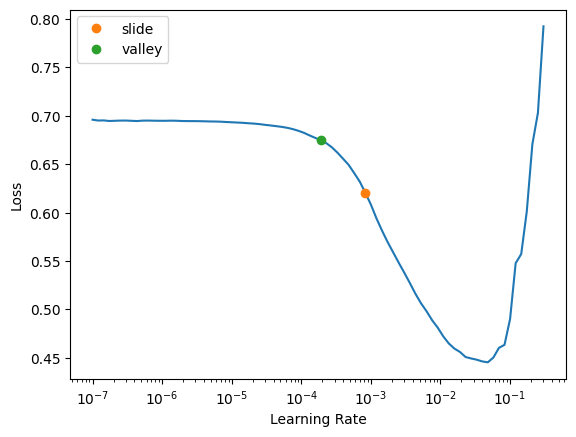

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(5,0.0003)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.095765,0.089880,0.955687,06:08
1,0.086728,0.084127,0.956922,06:07
2,0.086263,0.080323,0.960230,06:06
3,0.078468,0.078913,0.959953,06:10
4,0.077312,0.078197,0.959976,06:10


In [ ]:
learner.save("game-classifier-stage-0")

Path('models/book-classifier-stage-0.pth')

In [ ]:
learner.export("models/game-classifier-stage-0.pkl")

# Stage - 1 

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.0030199517495930195, valley=1.2022644114040304e-05)

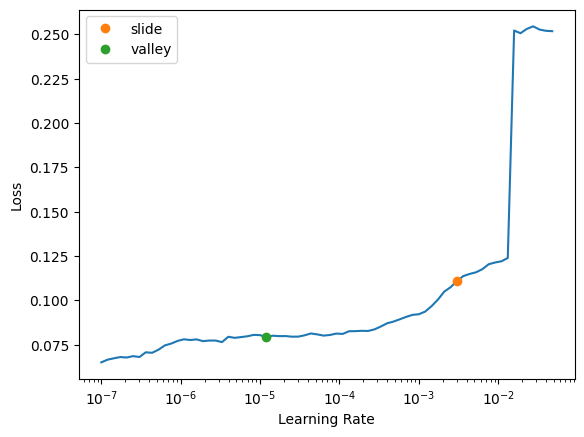

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(5,slice(0.002, 4.00e-5))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.096430,0.094212,0.953675,10:13
1,0.091431,0.097274,0.952177,10:08
2,0.076301,0.085819,0.958843,10:07
3,0.060151,0.085183,0.961124,10:10
4,0.045635,0.089262,0.962360,10:14


In [ ]:
learner.save("game-classifier-stage-1")

Path('models/book-classifier-stage-1.pth')

In [ ]:
learner.export("models/game-classifier-stage-1.pkl")